# Sistemas de EDOs

Embora EDOs escalares sejam responsáveis por descrever uma vasta quantidade de fenômenos naturais, muitas aplicações são melhor descritas através de um sistema de EDOs escalares ou de ordem superior. O tratamento numérico de EDOs de alta ordem baseia-se em uma conversão a sistemas de primeira ordem. Vejamos como escrever a forma geral de um sistema de duas EDOS de primeira ordem:

$$\begin{cases}
y_1'(t) &=& f_1(t, y_1(t), y_2(t)) \\
y_2'(t) &=& f_2(t, y_1(t), y_2(t))
\end{cases}$$

As funções $f_1(t,z_1,z_2)$ e $f_2(t,z_1,z_2)$ definem EDOs e as incógnitas são as funções $y_1(t)$ e $y_2(t)$. O problema de valor inicial então consiste de resolver o sistema anterior, sujeito às condições iniciais $y_1(t_0) = y_{1,0}$ e $y_2(t_0) = y_{2,0}$.


**Exemplo:** O PVI
$$\begin{cases}
y_1'(t) &=& y_1(t) − 2y_2(t) + 4\cos(t) − 2{\rm sen}(t) \\
y_2'(t) &=& 3y_1(t) − 4y_2(t) + 5\cos(t) − 5{\rm sen}(t) \\
y_1(0)  &=& 1 \\ 
y_2(0)  &=& 2
\end{cases}$$

tem por solução as funções $y_1(t) = \cos(t) + {\rm sen}(t)$ e $y_2(t) = 2\cos(t)$.

**Exemplo (Modelo de Lotka-Volterra):** O sistema de EDOs dado por 
$$\begin{cases}
y_1'(t) &=& A y_1(t)[1 − B y_2(t)] \\
y_2'(t) &=& C y_2(t)[D y_1(t) − 1] \\
y_1(0)  &=& y_{1,0} \\ 
y_2(0)  &=& y_{2,0}
\end{cases}$$

com constantes $A$, $B$, $C$, $D>0$ é conhecido como modelo _predador-presa_. A variável $t$ é o tempo, $y_1(t)$ o número de presas no tempo $t$ (e.g. coelhos) e $y_2(t)$ o número de predadores (e.g. raposas). Para apenas um tipo de predador e de presa, este modelo é uma aproximação razoável da realidade.


## Sistema com $m$ EDOs de primeira ordem

Um PVI com $m$ EDOs escalares é dado por 

$$\begin{cases}
y_1'(t) &=& f_1(t, y_1(t), y_2(t),\ldots,y_m(t)) \\
y_2'(t) &=& f_2(t, y_1(t), y_2(t),\ldots,y_m(t)) \\
\vdots  &\vdots& \vdots \\ 
y_m'(t) &=& f_m(t, y_1(t), y_2(t),\ldots,y_m(t)) \\ 
y_1(t_0)  &=& y_{1,0} \\ 
y_2(t_0)  &=& y_{2,0} \\
\vdots  &\vdots& \vdots \\ 
y_m(t_0)  &=& y_{m,0} \\
t_0 \leq t \leq b,
\end{cases}$$

cuja solução procurada são as funções $y_1(t), y_2(t),\ldots,y_m(t)$. Entretanto, a forma anterior não é computacionalmente adequada para se trabalhar. Assim, simplificamo-na para a forma vetorial 

$$\begin{cases}
{\bf y}'(t) &=& {\bf f}(t,{\bf y}(t)) \\
{\bf y}(t_0) &=& {\bf y}_0,
\end{cases}$$

onde

$${\bf y}(t) = 
\begin{bmatrix}
y_1(t) \\
\vdots \\
y_m(t) \\
\end{bmatrix}, 
\quad
{\bf y}_0 = 
\begin{bmatrix}
y_{1,0} \\
\vdots \\
y_{m,0} \\
\end{bmatrix}, 
\quad
{\bf f}(t,{\bf y}) = 
\begin{bmatrix}
f_1(t, y_1, y_2,\ldots,y_m) \\
\vdots \\
f_m(t, y_1, y_2,\ldots,y_m) \\
\end{bmatrix}, $$

com ${\bf y} = [y_1,y_2,\ldots,y_m]^T$.


**Exemplo:** O primeiro PVI pode ser reescrito como 

$$\begin{cases}
{\bf y}'(t) &=& {\bf A}{\bf y}(t) + {\bf G}(t) \\
{\bf y}(0) &=& {\bf y}_0, \\
\end{cases}$$

com 

$${\bf y} = 
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}, 
\quad
{\bf A} = 
\begin{bmatrix}
1 & -2 \\ 
3 & 4 
\end{bmatrix}, 
\quad
{\bf G}(t) = 
\begin{bmatrix}
4\cos(t) − 2{\rm sen}(t) \\
5\cos(t) − 5{\rm sen}(t)
\end{bmatrix}, 
\quad
{\bf y}_0 = 
\begin{bmatrix}
1 \\
2
\end{bmatrix}$$



## Métodos numéricos para sistemas 

Tanto o método de Euler quanto outros métodos numéricos podem ser usados de forma similar para sistemas de EDOs quando aplicados a cada EDO individual. Para isto, lança-se mão da forma matriz/vetor, em que a derivação é essencialmente a mesma feita para o caso individual. 

Lembremos que a série de Taylor desenvolvida para o método de Euler é dada por: 

$$y_j(t_{n+1}) = y_j(t_{n}) + hy_j'(t_{n}) + \dfrac{h^2}{2}y_j''(\xi_{n,j}), \ \ t_n \leq \xi_{n,j} \leq t_{n+1}, \quad j = 1,\ldots,m$$

para $m$ EDOs. Desprezando-se os termos de erro, o método de Euler em forma vetorial é escrito como 

$${\bf y}_{n+1} = {\bf y}_{n} + h{\bf f}(t_n,{\bf y}_n), \ \ \ {\bf y}_0 = {\bf y}(0)$$

### Implementação computacional 

O seguinte código é uma implementação do método de Euler para resolver sistemas de EDOs. O usuário necessita especificar uma função adicional para determinar as EDOs como componentes de um vetor. Isto é feito pela função 

```python
def fsys(t,y):
    (...)
    return F
```

In [1]:
from numpy import *

def euler_sys(t0,tf,y0,h,f):
    """
    Resolve o PVI de um sistema de EDOs escalares
    y’ = f(t,y), t0 <= t <= b, y(t0)=y0 pelo metodo de Euler com tamanho de passo h.
    O usuario deve fornecer um vetor f contendo as funcoes a serem avaliadas como 
    membro direito.
    
    Entrada: 
        t0  - tempo inicial
        tf  - tempo final 
        y0  - condicao inicial 
        h   - passo 
        f   - vetor de funcoes f(t,y) (anonima)
    
    Saída:
        t   - vetor contendo os valores nodais t[i], i = 1,2,...,n
        Y   - matriz de dimensoes n x m, com m sendo o numero de EDOs
             (a i-esima linha y[i,:] traz as estimativas de todas 
              as funcoes y_j no tempo t[i])
    """    
    
    m = y0.size
    n = round((tf - t0)/h + 1)
    t = linspace(t0,t0+(n-1)*h,n)
    Y = zeros((n,m))
    
    Y[0,:] = y0
    
    
    for i in range(1,n):  
        Y[i,:] = Y[i-1,:] + h*f(t[i-1],Y[i-1,:])     
        
    return t,Y


**Exercício resolvido:** Resolva o PVI abaixo pelo método de Euler: 

$$\begin{cases}
{\bf y}'(t) &=& {\bf A}{\bf y}(t) + {\bf G}(t) \\
{\bf y}(0) &=& {\bf y}_0, \\
\end{cases}$$

com

$${\bf y} = 
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}, 
\quad
{\bf A} = 
\begin{bmatrix}
1 & -2 \\ 
3 & -4 
\end{bmatrix}, 
\quad
{\bf G}(t) = 
\begin{bmatrix}
4\cos(t) - 2{\rm sen}(t) \\
5\cos(t) - 5{\rm sen}(t) 
\end{bmatrix}, 
\quad
{\bf y}_0 = 
\begin{bmatrix}
1 \\
2
\end{bmatrix}.$$

Resolver numericamente pelo método de Euler para $0 < t \le 5$ e $h = 0.5$.

In [2]:
# define funcao vetorial f(t,y)
def fsys(t,y):
    """
    Função definida pelo usuario para montar vetor das m funcoes fm(t,(y1,...,ym))
    Em cada componente prescrevemos a funcao da EDO correspondente no sistema 
    de m EDOs. 
    
    Isto e, 
    
    F = [f1(t,y1,...,ym),f2(t,y1,...,ym),...,fm(t,y1,...,ym)]^T 
    
    Neste exemplo, o sistema possui 2 EDOs, com:
    
    f1(t,y1,y2) = y1 - 2y2 + 4cos(t) - 2sin(t)
    f2(t,y1,y2) = 3y1 - 4y2 + 5cos(t) - 5sin(t)    
    """    
    F = array([y[0]-2*y[1]+4*cos(t)-2*sin(t),3*y[0]-4*y[1]+5*cos(t)-5*sin(t)])
    
    return F


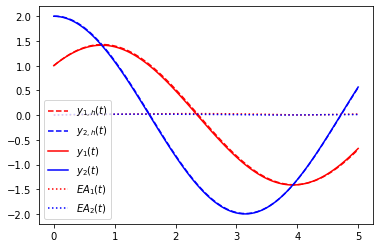

In [3]:
from matplotlib.pyplot import plot,legend


# parâmetros
t0,tf = 0,5
h = 0.05
y0 = array([1,2])

# solução numérica do sistema
t,Y = euler_sys(t0,tf,y0,h,fsys)
y1_num = Y[:,0]
y2_num = Y[:,1]

# solução analítica
y1_an = cos(t) + sin(t)
y2_an = 2*cos(t)

# plotagem
plot(t,y1_num,'r--',label='$y_{1,h}(t)$')
plot(t,y2_num,'b--',label='$y_{2,h}(t)$')

plot(t,y1_an,'r',label='$y_1(t)$')
plot(t,y2_an,'b',label='$y_2(t)$')

# erro absoluto
plot(t,abs(y1_an - y1_num),'r:',label='$EA_1(t)$')
plot(t,abs(y2_an - y2_num),'b:',label='$EA_2(t)$')

legend(loc=3,fontsize=10);


**Exercício:** Considere o PVI 

$$\begin{cases}
{\bf y}'(t) &=& {\bf A}{\bf y}(t) + {\bf G}(t) \\
{\bf y}(0) &=& {\bf y}_0, \\
\end{cases}$$

com 

$${\bf y} = 
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}, 
\quad
{\bf A} = 
\begin{bmatrix}
1 & -2 \\ 
2 & 1 
\end{bmatrix}, 
\quad
{\bf G}(t) = 
\begin{bmatrix}
-2\exp(-t) + 2 \\
-2\exp(-t) + 1 \\
\end{bmatrix}, 
\quad
{\bf y}_0 = 
\begin{bmatrix}
1 \\
1
\end{bmatrix}.$$

para $t \in (0,t_f]$ e $ 0 < h < 1$ convenientemente escolhidos. Verifique que a sua solução analítica é dada por ${\bf y} = [\exp(-t), 1]^T$, resolva-o numericamente, plote os gráficos das curvas da solução numérica e do _erro relativo_ para cada uma. Compare os gráficos com aqueles das curvas da solução analítica.

## Problemas

**Problema:** considere o modelo de Lotka-Volterra com os parâmetros $A = 4$, $B = 1$, $C = 3$ e $D = 1$. Usando o método de Euler, resolva-o para $0 \le t \le 5$. Use passos de $h = 0.001$, $0.0005$ e $0.00025$ e a condição inicial values $y_1(0) = 3$, $y_2(0) = 5$. Plote as funções $y_1$ e $y_2$ em função de $t$ e, depois, plote o gráfico de $y_1$ _versus_ $y_2$. Comente os resultados.

**Problema:** Considere o esquema numérico
    
$$y_{n+1} =  y_n + \frac{h}{2}[f(t_n,y_n) + f(t_{n+1},y_n + h f(t_n,y_n))]$$

Tente adaptá-lo para resolver o PVI do **Exercício resolvido**.
    